Approximate minimum in region q < p: z = -0.4987 at (p, q) ≈ (0.501, 0.001)
0.625


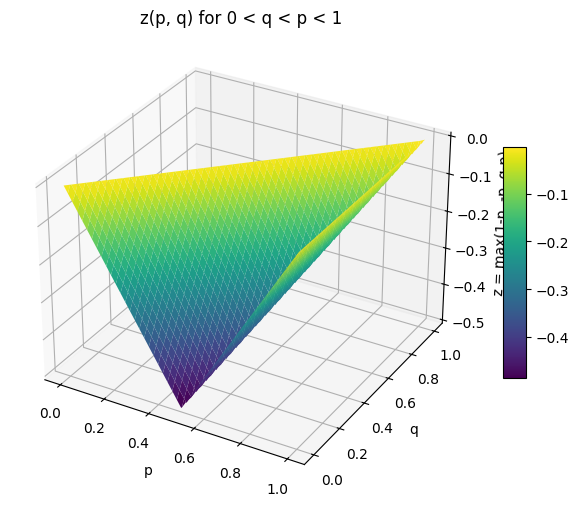

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid
n = 400
p = np.linspace(0.001, 0.999, n)
q = np.linspace(0.001, 0.999, n)
P, Q = np.meshgrid(p, q)

# Compute the function
Z = np.maximum.reduce([P-1, -P, Q - P])

# Apply domain restriction: only keep points where q < p
mask = Q < P
Z_restricted = np.where(mask, Z, np.nan)

# Find approximate minimizer within the restricted domain
# Use masked array to ignore NaNs
Z_flat = Z_restricted.ravel()
valid_indices = np.where(~np.isnan(Z_flat))[0]
min_idx_flat = valid_indices[np.argmin(Z_flat[valid_indices])]
min_idx = np.unravel_index(min_idx_flat, Z_restricted.shape)

p_min = P[min_idx]
q_min = Q[min_idx]
z_min = Z_restricted[min_idx]

print(f"Approximate minimum in region q < p: z = {z_min:.4f} at (p, q) ≈ ({p_min:.3f}, {q_min:.3f})")
print(5/8)

# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(P, Q, Z_restricted, cmap='viridis', linewidth=0, antialiased=True)
ax.set_xlabel('p')
ax.set_ylabel('q')
ax.set_zlabel('z = max(1-p, -p, q-p)')
ax.set_title('z(p, q) for 0 < q < p < 1')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

Approximate minimum: z = -0.4990 at (p, q) ≈ (0.501, 0.001)


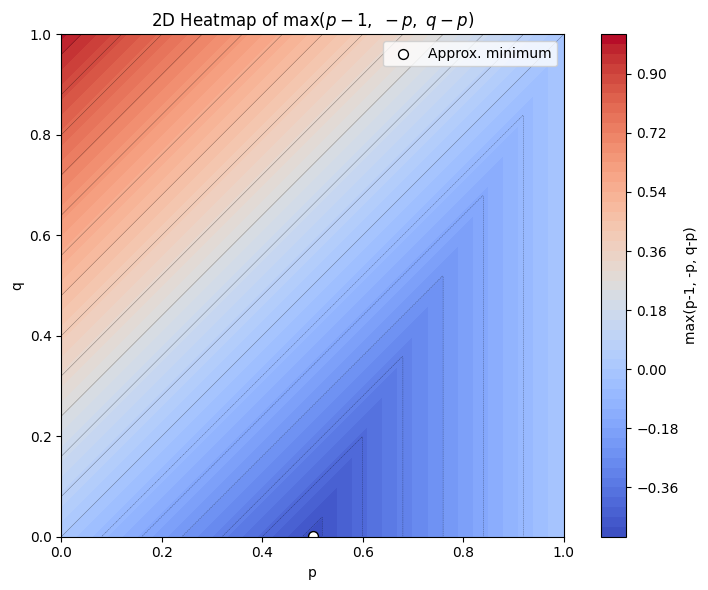

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid
n = 500
p = np.linspace(0.001, 0.999, n)
q = np.linspace(0.001, 0.999, n)
P, Q = np.meshgrid(p, q)

# Compute z = max(p - 1, -p, q - p)
Z = np.maximum.reduce([P - 1, -P, Q - P])

# Find approximate minimizer
min_idx = np.unravel_index(np.argmin(Z), Z.shape)
p_min = P[min_idx]
q_min = Q[min_idx]
z_min = Z[min_idx]

print(f"Approximate minimum: z = {z_min:.4f} at (p, q) ≈ ({p_min:.3f}, {q_min:.3f})")

# 2D Heatmap with contours
plt.figure(figsize=(8, 6))
contourf = plt.contourf(P, Q, Z, levels=50, cmap='coolwarm')
contour = plt.contour(P, Q, Z, levels=20, colors='k', linewidths=0.3, alpha=0.5)
plt.colorbar(contourf, label='max(p-1, -p, q-p)')
plt.xlabel('p')
plt.ylabel('q')
plt.title('2D Heatmap of $\\max(p - 1,\\ -p,\\ q - p)$')
plt.scatter([p_min], [q_min], color='white', edgecolor='black', s=50, label='Approx. minimum')
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1) 
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

Minimum at p = 0.6663, z = -0.3330


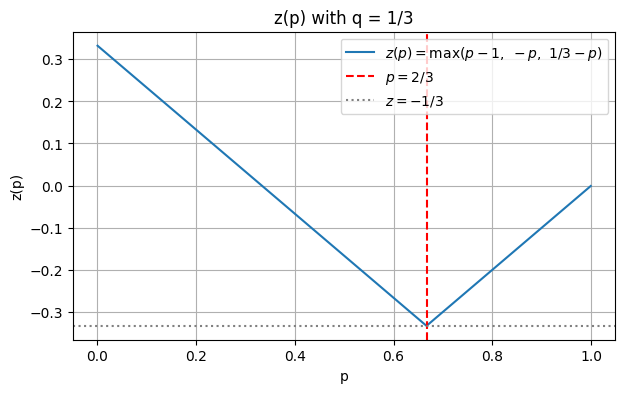

In [3]:
import numpy as np
import matplotlib.pyplot as plt

q = 1/3
p = np.linspace(0.001, 0.999, 1000)
z = np.maximum.reduce([p - 1, -p, q - p])

# Find min
min_idx = np.argmin(z)
p_min = p[min_idx]
z_min = z[min_idx]

print(f"Minimum at p = {p_min:.4f}, z = {z_min:.4f}")

plt.figure(figsize=(7, 4))
plt.plot(p, z, label=r'$z(p) = \max(p-1,\ -p,\ 1/3 - p)$')
plt.axvline(2/3, color='red', linestyle='--', label=r'$p = 2/3$')
plt.axhline(-1/3, color='gray', linestyle=':', label=r'$z = -1/3$')
plt.xlabel('p')
plt.ylabel('z(p)')
plt.title('z(p) with q = 1/3')
plt.legend()
plt.grid(True)
plt.show()

Approximate minimum under constraints: z = -0.49750 at (p, q) ≈ (0.5025, 0.0010)


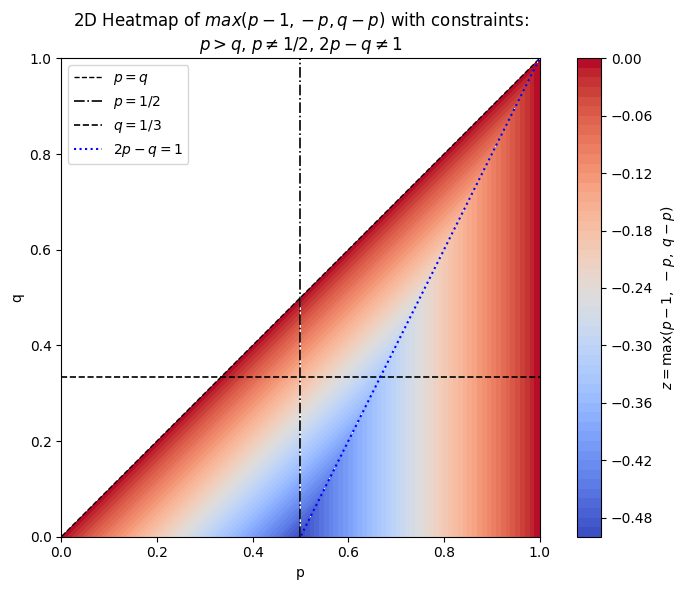

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 600
eps = 1e-3  # tolerance for excluding equality constraints

# Grid
p = np.linspace(0.001, 0.999, n)
q = np.linspace(0.001, 0.999, n)
P, Q = np.meshgrid(p, q)

# Compute the function
Z = np.maximum.reduce([P - 1, -P, Q - P])

# Apply constraints
mask = (
    (P > Q) &                            # p > q
    (np.abs(P - 0.5) > eps) &           # p != 0.5  → exclude |p - 0.5| <= eps
    (np.abs(2*P - Q - 1) > eps)         # 2p - q != 1 → exclude |2p - q - 1| <= eps
)

# Apply mask: set invalid points to NaN (won't be plotted)
Z_masked = np.where(mask, Z, np.nan)

# Find approximate minimizer among valid points
valid_vals = Z_masked[~np.isnan(Z_masked)]
if valid_vals.size > 0:
    min_val = np.min(valid_vals)
    min_idx = np.where(Z_masked == min_val)
    p_min = P[min_idx][0]
    q_min = Q[min_idx][0]
    print(f"Approximate minimum under constraints: z = {min_val:.5f} at (p, q) ≈ ({p_min:.4f}, {q_min:.4f})")
else:
    print("No valid points satisfy all constraints (unlikely with current eps).")

# Plot
plt.figure(figsize=(8, 6))
contourf = plt.contourf(P, Q, Z_masked, levels=60, cmap='coolwarm')
plt.colorbar(contourf, label=r'$z = \max(p-1,\ -p,\ q-p)$')

# Optional: overlay constraint boundaries for reference
p_line = np.linspace(0.001, 0.999, 400)
plt.plot(p_line, p_line, 'k--', lw=1, label=r'$p = q$')                   # boundary of p > q
plt.axvline(0.5, color='black', linestyle='-.', linewidth=1.2, label=r'$p = 1/2$')
plt.axhline(1/3, color='black', linestyle='--', linewidth=1.2, label=r'$q = 1/3$')
q_line = 2*p_line - 1
plt.plot(p_line[(q_line > 0) & (q_line < 1)], q_line[(q_line > 0) & (q_line < 1)],
         'b:', linewidth=1.5, label=r'$2p - q = 1$')

plt.xlabel('p')
plt.ylabel('q')
plt.title('2D Heatmap of $max(p-1, -p, q-p)$ with constraints:\n$p > q$, $p \\neq 1/2$, $2p - q \\neq 1$')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc='upper left')
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()